# NuSVC with Normalize & Power Transformer


**This Code template is for the Classification task using NuSVC Classifier with Normalizer feature scaling technique and PowerTransformer as Feature Transformation Technique in a pipeline.**

### Required Packages

In [1]:
!pip install imblearn

In [2]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer,PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.svm import NuSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= ""

List of features which are  required for model training .

In [4]:
#x_values
features=[]

Target feature for prediction.

In [5]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [7]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 303 ,and number of columns are : 14


In [8]:
df.columns.tolist()


['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [9]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

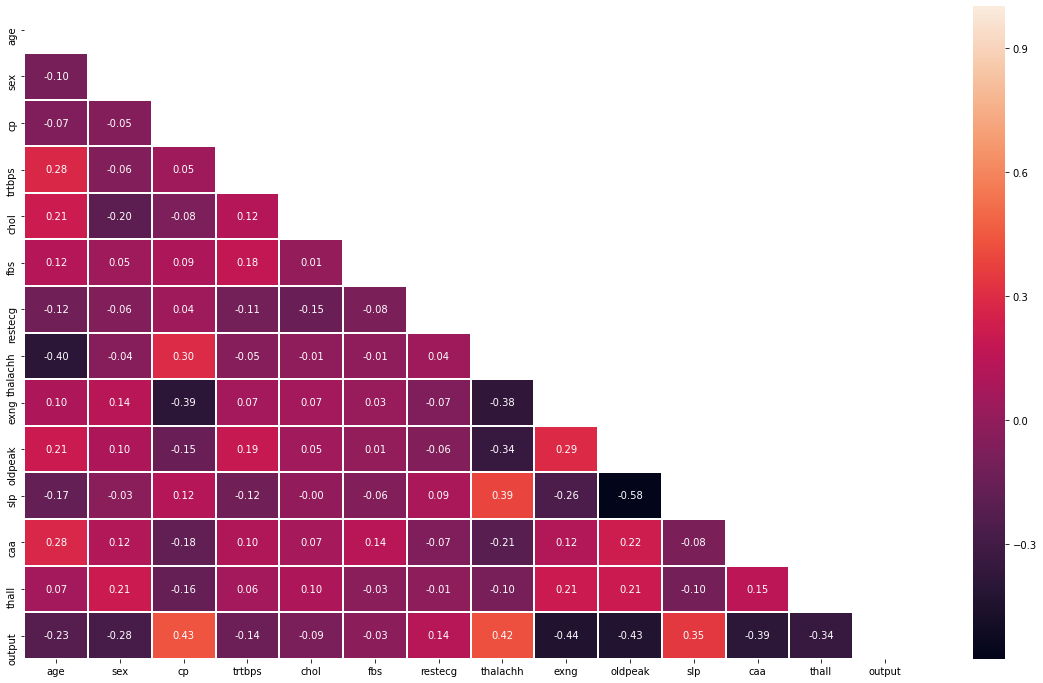

In [10]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [11]:
#spliting data into X(features) and Y(Target)

X=df[features]
Y=df[target]   

In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2

#### Distribution Of Target Variable

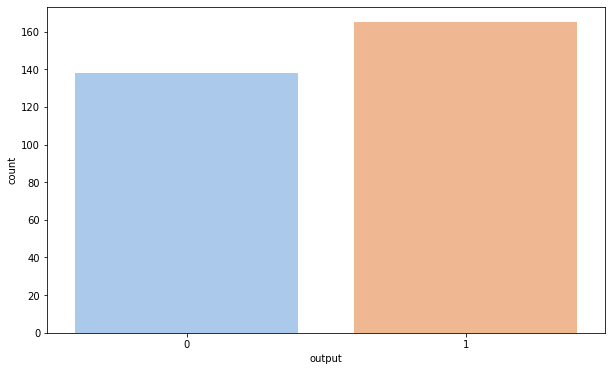

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(Y,palette='pastel')

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [14]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123) #performing datasplitting

### Handling Target Imbalance
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [15]:
X_train,y_train = RandomOverSampler(random_state=123).fit_resample(X_train, y_train)


### Feature Transformation

**PowerTransformer**

PowerTransformer applies a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

### Feature Rescaling
#### Normalizer

* Normalizer normalizes samples (rows) individually to unit norm.
* Each sample with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
* We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

## Model
**NuSVC :**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations.

#### Model Tuning Parameters

* nu -> An upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1].

* kernel -> Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

* gamma -> Gamma is a hyperparameter that we have to set before the training model. Gamma decides how much curvature we want in a decision boundary.

* degree -> Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.Using degree 1 is similar to using a linear kernel. Also, increasing degree parameter leads to higher training times.

In [16]:
# Build Model here
model=make_pipeline(Normalizer(),PowerTransformer(),NuSVC(random_state=123))
model.fit(X_train,y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('powertransformer', PowerTransformer()),
                ('nusvc', NuSVC(random_state=123))])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [17]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 78.69 %



In [18]:
#prediction on testing set
prediction=model.predict(X_test)

#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

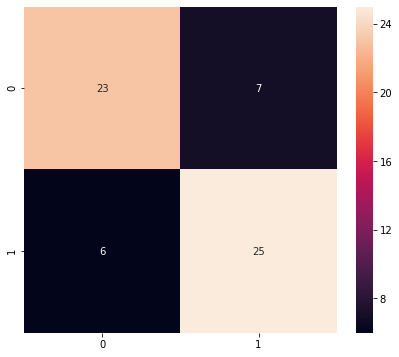

In [19]:
#ploting_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)
cf_matrix=confusion_matrix(y_test,prediction)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt="d")


#### Classification Report

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [20]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.78      0.81      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



#### Creator: Vipin Kumar , Github: [Profile](https://github.com/devVipin01)